In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
dtypes = {
    "keyword": "category",
    "location": "category",
    "target": "bool",
}
tweets = pd.read_csv('Data/train.csv', dtype=dtypes)
tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,True
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,True


In [29]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        7613 non-null   int64   
 1   keyword   7552 non-null   category
 2   location  5080 non-null   category
 3   text      7613 non-null   object  
 4   target    7613 non-null   bool    
dtypes: bool(1), category(2), int64(1), object(1)
memory usage: 344.1+ KB


In [114]:
tweets[~tweets['keyword'].isnull()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,True
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,False
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,True
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,False
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,False
...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,False
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,False
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,False
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,False


# ¿Qué ciudades tienen más tuits?

In [159]:
tweets_with_location = tweets[~tweets["location"].isnull()]
tweets_with_location.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,True
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,False
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,True
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,False
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,False


In [160]:
tweets_with_location["location"].unique()

[Birmingham, Est. September 2012 - Bristol, AFRICA, Philadelphia, PA, London, UK, ..., TN, #NewcastleuponTyne #UK, Vancouver, Canada, London, Lincoln]
Length: 3341
Categories (3341, object): [Birmingham, Est. September 2012 - Bristol, AFRICA, Philadelphia, PA, ..., #NewcastleuponTyne #UK, Vancouver, Canada, London, Lincoln]

In [161]:
tweets_grouped_by_location = tweets_with_location.groupby(["location"]).aggregate({'target': ['count']})
tweets_grouped_by_location.head(10)

,target
,count
location,
,1
Glasgow,1
"Melbourne, Australia",1
News,1
å_,1
45å¡ 5'12.53N 14å¡ 7'24.93E,1
"616 Û¢ Kentwood , MI",1
? ??????? ? ( ?? å¡ ? ? ? å¡),1


In [162]:
tgbl = tweets_grouped_by_location
top_locations = tgbl.sort_values(('target', 'count'), ascending=False).head(10)
top_locations

,target
,count
location,
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26


## Observaciones

Vemos que hay paises repetidos escritos de forma distinta, vemos que hay ciudades y paises mezclados. Podría tener sentido que no modifiquemos las ciudades ya que es un poco más de información que si lo pensamos por país y sería muy laborioso ir entre las 3341 location distintas que tenemos para ver a qué país pertenecen. Pero vamos a hacer algunas mejoras como unificar los paises que detectemos que están escrito de forma distinta varias veces y crear una categoría "Otros" para aquellas location que ocupen la cola en la distribución de tuits por location

In [163]:
tgbl.sort_values(('target', 'count'), ascending=False).head(10)

,target
,count
location,
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26


In [167]:
# junto todos los que dicen USA con los que dice United States
tweets_with_location.loc[:,['location']] = tweets_with_location['location'].str.replace('United States', 'USA', case=False)

In [174]:
tweets_grouped_by_location = tweets_with_location.groupby(["location"]).aggregate({'target': ['count']})
tgbl = tweets_grouped_by_location
top_locations = tgbl.sort_values(('target', 'count'), ascending=False).head(10)
top_locations

,target
,count
location,
USA,154
New York,71
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24


In [173]:
len(tweets_with_location["location"].unique())

3337

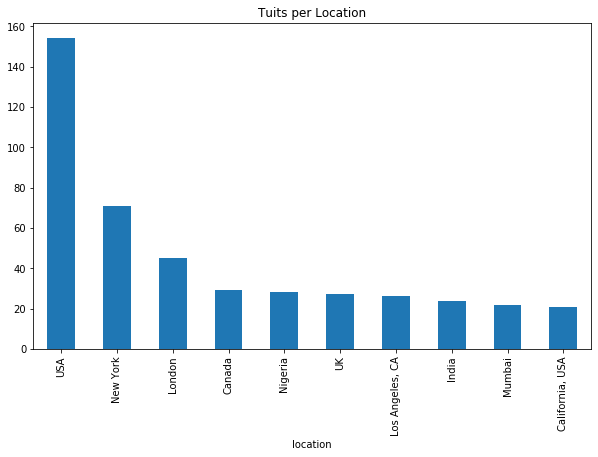

In [175]:
top_locations.loc[:,('target','count')].plot(kind='bar',title='Tuits per Location', linewidth=2, figsize=(10,6))

# ¿Qué ciudades tienen más tuits verdaderos?

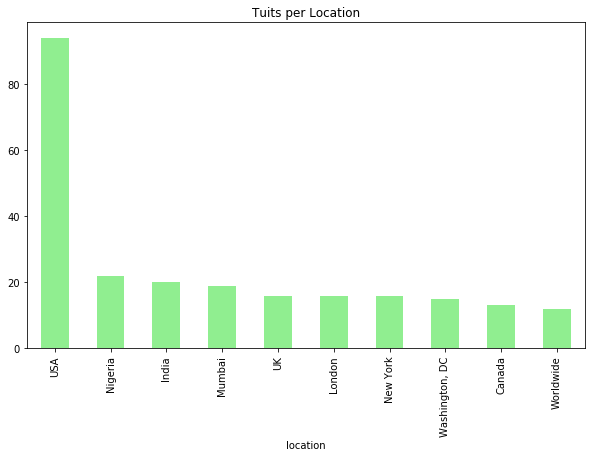

In [176]:
real_twt_by_location = tweets_with_location[tweets_with_location['target']==True].groupby(["location"]).aggregate({'target': ['count']})
top_real_twt_locations = real_twt_by_location.sort_values(('target', 'count'), ascending=False).head(10)
top_real_twt_locations.loc[:,('target','count')].plot(kind='bar',title='Tuits per Location', linewidth=2, figsize=(10,6), color='LightGreen')

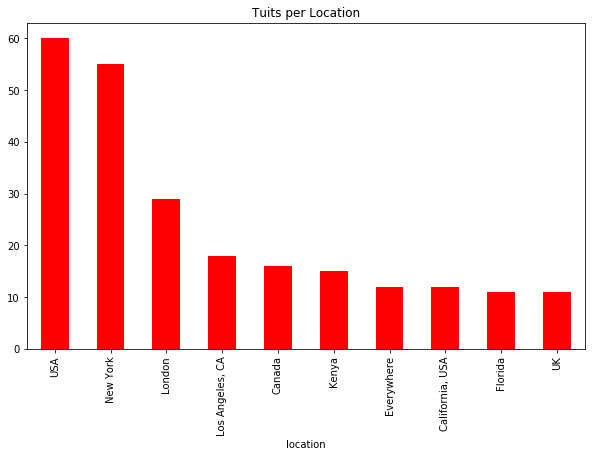

In [177]:
false_twt_by_location = tweets_with_location[tweets_with_location['target']==False].groupby(["location"]).aggregate({'target': ['count']})
top_false_twt_locations = false_twt_by_location.sort_values(('target', 'count'), ascending=False).head(10)
top_false_twt_locations.loc[:,('target','count')].plot(kind='bar',title='Tuits per Location', linewidth=2, figsize=(10,6), color='Red')

In [178]:
tweets_grouped_by_location_and_target = tweets_with_location.groupby(['location', 'target']).size().nlargest(10)
by_loc_and_tar = tweets_grouped_by_location_and_target
by_loc_and_tar

location         target
USA              True      94
                 False     60
New York         False     55
London           False     29
Nigeria          True      22
India            True      20
Mumbai           True      19
Los Angeles, CA  False     18
Canada           False     16
London           True      16
dtype: int64

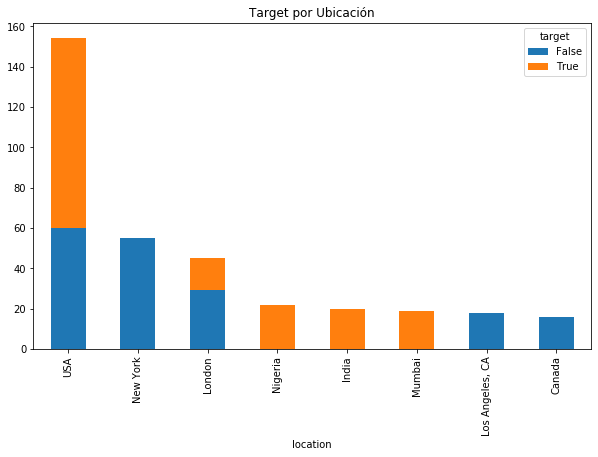

In [179]:
by_loc_and_tar.unstack().plot(kind='bar',title='Target por Ubicación', linewidth=2, figsize=(10,6), stacked=True)

In [91]:
tweets_grouped_by_location_and_target = tweets_with_location.groupby(["location"]).aggregate({"target": ["count"]})
tweets_grouped_by_location_and_target.loc[tweets_grouped_by_location_and_target[('target', 'count')]>5,:].

,target
,count
location,
Road to the Billionaires Club,6
304,9
??????,6
Atlanta,6
"Atlanta, GA",10
...,...
"Washington, DC",21
World,9


In [31]:
tweets_without_location = tweets[tweets["location"].isnull()]
tweets_without_location

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,True
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,True


In [35]:
tweets_with_location.groupby(['location'])['target'].count()

location
                          1
  Glasgow                 1
  Melbourne, Australia    1
  News                    1
  å_                      1
                         ..
å_: ?? ÌÑ ? : ?           1
å_å_Los Mina Cityã¢      1
å¡å¡Midwest Û¢Û¢        1
åÊ(?Û¢`?Û¢å«)??         1
åø\_(?)_/åø               1
Name: target, Length: 3341, dtype: int64

In [ ]:
tweets_with_location.

In [227]:
tweets['text_length'] = tweets['text'].str.len()
disaster_tweets = tweets.loc[tweets["target"]==1]
disaster_tweets

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,True,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,True,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,True,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",True,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,True,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,True,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,True,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,True,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,True,137


In [228]:
disaster_tweets["text_length"].agg(["mean", "max", "min"])

mean    108.113421
max     151.000000
min      14.000000
Name: text_length, dtype: float64

In [229]:
not_disaster_tweets = tweets.loc[tweets["target"]==0]
not_disaster_tweets

,id,keyword,location,text,target,text_length
15,23,NaN,NaN,What's up man?,False,14
16,24,NaN,NaN,I love fruits,False,13
17,25,NaN,NaN,Summer is lovely,False,16
18,26,NaN,NaN,My car is so fast,False,17
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,False,28
...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,False,104
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,False,80
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,False,127
7587,10841,NaN,NaN,Sirens everywhere!,False,18


In [230]:
not_disaster_tweets["text_length"].agg(["mean", "max", "min"])

mean     95.706817
max     157.000000
min       7.000000
Name: text_length, dtype: float64

# How is the length distribution in tweets about real disasters?

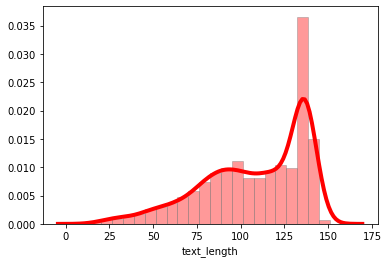

In [243]:
# Density Plot and Histogram using sns
sns.distplot(disaster_tweets['text_length'], hist=True, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

# How is the length distribution in tweets that are not about real disasters?

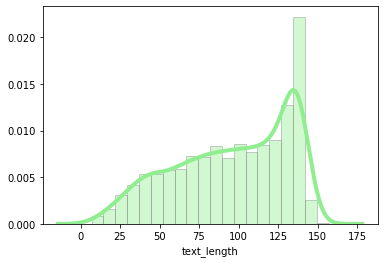

In [242]:
sns.distplot(not_disaster_tweets['text_length'], hist=True, kde=True, 
             color = 'lightgreen', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

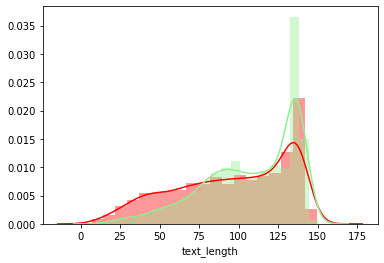

In [241]:
sns.distplot( not_disaster_tweets['text_length'] , color="red", label="Not real disaster")
sns.distplot( disaster_tweets['text_length'] , color="lightgreen", label="Real disaster")

plt.legend()